# Dataset preparation

This notebook will download and prepare all dataset used in our experiments which includes:
- Paderborn University bearings dataset
- CWRU bearings dataset
- IMS bearing dataset hosted by NASA
- MFPT bearing dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import py7zr
import random
import rarfile
import requests
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import torch
import urllib.request
import zipfile

# Set seed

In [2]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    
set_seed(42)

# Download & Extract dataset

In [6]:
# Paderborn bearings dataset
PU_links = {
    'K001': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/K001.rar',
    'K002': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/K002.rar',
    'K003': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/K003.rar',
    'K004': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/K004.rar',
    'K005': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/K005.rar',
    'K006': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/K006.rar',
    'KA01': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA01.rar',
    'KA03': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA03.rar',
    'KA04': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA04.rar',
    'KA05': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA05.rar',
    'KA06': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA06.rar',
    'KA07': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA07.rar',
    'KA08': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA08.rar',
    'KA09': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA09.rar',
    'KA15': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA15.rar',
    'KA16': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA16.rar',
    'KA22': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA22.rar',
    'KA30': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KA30.rar',
    'KB23': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KB23.rar',
    'KB24': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KB24.rar',
    'KB27': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KB27.rar',
    'KI01': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI01.rar',
    'KI03': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI03.rar',
    'KI04': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI04.rar',
    'KI05': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI05.rar',
    'KI07': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI07.rar',
    'KI08': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI08.rar',
    'KI14': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI14.rar',
    'KI16': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI16.rar',
    'KI17': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI17.rar',
    'KI18': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI18.rar',
    'KI21': 'http://groups.uni-paderborn.de/kat/BearingDataCenter/KI21.rar',
}

In [4]:
# CWRU bearings dataset
CWRU_links = {
    'normal_0': 'https://engineering.case.edu/sites/default/files/97.mat',
    'normal_1': 'https://engineering.case.edu/sites/default/files/98.mat',
    'normal_2': 'https://engineering.case.edu/sites/default/files/99.mat',
    'normal_3': 'https://engineering.case.edu/sites/default/files/100.mat',
    
    '12k_DE_IR007_0': 'https://engineering.case.edu/sites/default/files/105.mat',
    '12k_DE_IR007_1': 'https://engineering.case.edu/sites/default/files/106.mat',
    '12k_DE_IR007_2': 'https://engineering.case.edu/sites/default/files/107.mat',
    '12k_DE_IR007_3': 'https://engineering.case.edu/sites/default/files/108.mat',
    
    '12k_DE_B007_0': 'https://engineering.case.edu/sites/default/files/118.mat',
    '12k_DE_B007_1': 'https://engineering.case.edu/sites/default/files/119.mat',
    '12k_DE_B007_2': 'https://engineering.case.edu/sites/default/files/120.mat',
    '12k_DE_B007_3': 'https://engineering.case.edu/sites/default/files/121.mat',
    
    '12k_DE_OR007@6_0': 'https://engineering.case.edu/sites/default/files/130.mat',
    '12k_DE_OR007@6_1': 'https://engineering.case.edu/sites/default/files/131.mat',
    '12k_DE_OR007@6_2': 'https://engineering.case.edu/sites/default/files/132.mat',
    '12k_DE_OR007@6_3': 'https://engineering.case.edu/sites/default/files/133.mat',
    
    
    '12k_DE_IR014_0': 'https://engineering.case.edu/sites/default/files/169.mat',
    '12k_DE_IR014_1': 'https://engineering.case.edu/sites/default/files/170.mat',
    '12k_DE_IR014_2': 'https://engineering.case.edu/sites/default/files/171.mat',
    '12k_DE_IR014_3': 'https://engineering.case.edu/sites/default/files/172.mat',
    
    '12k_DE_B014_0': 'https://engineering.case.edu/sites/default/files/185.mat',
    '12k_DE_B014_1': 'https://engineering.case.edu/sites/default/files/186.mat',
    '12k_DE_B014_2': 'https://engineering.case.edu/sites/default/files/187.mat',
    '12k_DE_B014_3': 'https://engineering.case.edu/sites/default/files/188.mat',
    
    '12k_DE_OR014@6_0': 'https://engineering.case.edu/sites/default/files/197.mat',
    '12k_DE_OR014@6_1': 'https://engineering.case.edu/sites/default/files/198.mat',
    '12k_DE_OR014@6_2': 'https://engineering.case.edu/sites/default/files/199.mat',
    '12k_DE_OR014@6_3': 'https://engineering.case.edu/sites/default/files/200.mat',
    
    
    '12k_DE_IR021_0': 'https://engineering.case.edu/sites/default/files/209.mat',
    '12k_DE_IR021_1': 'https://engineering.case.edu/sites/default/files/210.mat',
    '12k_DE_IR021_2': 'https://engineering.case.edu/sites/default/files/211.mat',
    '12k_DE_IR021_3': 'https://engineering.case.edu/sites/default/files/212.mat',
    
    '12k_DE_B021_0': 'https://engineering.case.edu/sites/default/files/222.mat',
    '12k_DE_B021_1': 'https://engineering.case.edu/sites/default/files/223.mat',
    '12k_DE_B021_2': 'https://engineering.case.edu/sites/default/files/224.mat',
    '12k_DE_B021_3': 'https://engineering.case.edu/sites/default/files/225.mat',
    
    '12k_DE_OR021@6_0': 'https://engineering.case.edu/sites/default/files/234.mat',
    '12k_DE_OR021@6_1': 'https://engineering.case.edu/sites/default/files/235.mat',
    '12k_DE_OR021@6_2': 'https://engineering.case.edu/sites/default/files/236.mat',
    '12k_DE_OR021@6_3': 'https://engineering.case.edu/sites/default/files/237.mat',
}

In [3]:
# IMS bearings dataset
IMS_links = {
    'IMS': 'https://phm-datasets.s3.amazonaws.com/NASA/4.+Bearings.zip'
}

In [7]:
# MFPT bearings dataset
MFPT_links = {
    'MFPT': 'https://www.mfpt.org/wp-content/uploads/2020/02/MFPT-Fault-Data-Sets-20200227T131140Z-001.zip'
}

In [5]:
def download_and_extract(file_name, url, folder_path, dtype, extract_function):
    while True:
        try:
            print(f"Downloading {url}")
            urllib.request.urlretrieve(url, os.path.join(folder_path, f'{file_name}{dtype}'))
            print(f'Extracting {file_name}{dtype}')
            extract_function(folder_path, file_name)
            break  # Exit the loop if the download is successful
        except Exception as e:
            print(f"Failed to download {url}: {e}")
    
def extract_nothing(folder, file_name):
    pass

def extract_rar(folder, file_name):
    print(f'Extract {os.path.join(folder, file_name)}.rar manually')
#     with rarfile.RarFile(os.path.join(folder, f'{file_name}.rar')) as rf:
#         rf.extractall(os.path.join(folder, file_name))
    pass
        
def extract_zip(folder, file_name):
    with zipfile.ZipFile(os.path.join(folder, f'{file_name}.zip'), 'r') as zip_ref:
        zip_ref.extractall(os.path.join(folder, file_name))
        
def extract_7zip(folder, file_name):
    with py7zr.SevenZipFile(os.path.join(folder, f'{file_name}.7z'), mode='r') as sevenzip:
        sevenzip.extractall(os.path.join(folder, file_name))

In [6]:
# Download & Extract CWRU dataset
folder_path = os.path.join(os.getcwd(), 'CWRU')
os.makedirs(folder_path, exist_ok=True)
for file_name, url_link in CWRU_links.items():
    if not os.path.exists(os.path.join(folder_path, f'file_name.mat')):
        download_and_extract(file_name, url_link, folder_path, '.mat', extract_nothing)

Extracting normal_0.mat
Failed to download https://engineering.case.edu/sites/default/files/98.mat: <urlopen error retrieval incomplete: got only 2407258 out of 7742720 bytes>
Failed to download https://engineering.case.edu/sites/default/files/98.mat: <urlopen error retrieval incomplete: got only 2799089 out of 7742720 bytes>
Extracting normal_1.mat
Failed to download https://engineering.case.edu/sites/default/files/99.mat: <urlopen error retrieval incomplete: got only 3416324 out of 15503928 bytes>
Failed to download https://engineering.case.edu/sites/default/files/99.mat: <urlopen error retrieval incomplete: got only 4719559 out of 15503928 bytes>
Failed to download https://engineering.case.edu/sites/default/files/99.mat: <urlopen error retrieval incomplete: got only 3875982 out of 15503928 bytes>
Failed to download https://engineering.case.edu/sites/default/files/99.mat: <urlopen error retrieval incomplete: got only 3183301 out of 15503928 bytes>
Failed to download https://engineeri

In [7]:
# Download & Extract Paderborn dataset
folder_path = os.path.join(os.getcwd(), 'Paderborn')
os.makedirs(folder_path, exist_ok=True)
for file_name, url_link in PU_links.items():
    if not os.path.exists(os.path.join(folder_path, file_name)):
        download_and_extract(file_name, url_link, folder_path, '.rar', extract_rar)

KeyboardInterrupt: 

In [5]:
# Download & Extract IMS dataset
folder_path = os.path.join(os.getcwd(), 'IMS')
os.makedirs(folder_path, exist_ok=True)
for file_name, url_link in IMS_links.items():
    if not os.path.exists(os.path.join(folder_path, file_name)):
        download_and_extract(file_name, url_link, folder_path, '.zip', extract_zip)

# Unzip the 7zip folder inside zipfolder & extract .rar files inside inner 7zip folder
if not os.path.exists(os.path.join(folder_path, 'IMS', '4. Bearings', 'IMS')):
    extract_7zip(os.path.join(folder_path, 'IMS', '4. Bearings'), 'IMS')
    extract_rar(os.path.join(folder_path, 'IMS', '4. Bearings', 'IMS'), '1st_test')
    extract_rar(os.path.join(folder_path, 'IMS', '4. Bearings', 'IMS'), '2nd_test')
    extract_rar(os.path.join(folder_path, 'IMS', '4. Bearings', 'IMS'), '3rd_test')

In [8]:
# Download & Extract MFPT dataset manually

# folder_path = os.path.join(os.getcwd(), 'MFPT')
# os.makedirs(folder_path, exist_ok=True)
# for file_name, url_link in MFPT_links.items():
#     if not os.path.exists(os.path.join(folder_path, file_name)):
#         download_and_extract(file_name, url_link, folder_path, '.zip', extract_zip)

Failed to download https://www.mfpt.org/wp-content/uploads/2020/02/MFPT-Fault-Data-Sets-20200227T131140Z-001.zip: HTTP Error 403: Forbidden
Failed to download https://www.mfpt.org/wp-content/uploads/2020/02/MFPT-Fault-Data-Sets-20200227T131140Z-001.zip: HTTP Error 403: Forbidden
Failed to download https://www.mfpt.org/wp-content/uploads/2020/02/MFPT-Fault-Data-Sets-20200227T131140Z-001.zip: HTTP Error 403: Forbidden
Failed to download https://www.mfpt.org/wp-content/uploads/2020/02/MFPT-Fault-Data-Sets-20200227T131140Z-001.zip: HTTP Error 403: Forbidden


KeyboardInterrupt: 

# Process CWRU dataset

In [13]:
file_path = os.path.join(os.getcwd(), "CWRU", f'normal_2.mat')
data = loadmat(file_path)
print(data[])

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:19:25 2000', '__version__': '1.0', '__globals__': [], 'ans': array([[1]], dtype=uint8), 'X098_DE_time': array([[ 0.046104  ],
       [-0.03713354],
       [-0.089496  ],
       ...,
       [-0.09909231],
       [-0.10827138],
       [-0.07092923]]), 'X098_FE_time': array([[ 0.02321636],
       [ 0.08115455],
       [ 0.09533091],
       ...,
       [-0.00760182],
       [ 0.04026909],
       [ 0.06102   ]]), 'X099_DE_time': array([[ 0.06425354],
       [ 0.06300185],
       [-0.00438092],
       ...,
       [ 0.00521538],
       [-0.06571385],
       [-0.12266585]]), 'X099_FE_time': array([[0.03862545],
       [0.09676909],
       [0.12738182],
       ...,
       [0.03164   ],
       [0.113     ],
       [0.16292545]])}


In [11]:
def read(matlab_dict):
    folder = os.path.join(os.getcwd(), "CWRU")
    matlab_array = {}
    for var_name, _ in matlab_dict.items():
        file_path = os.path.join(folder, f'{var_name}.mat')
        
        # Read the matlab file and save into a dict
        data = loadmat(file_path)
        
        columns = list(data.keys())[3:5]
        
        DE_time_array = data[columns[0]]
        FE_time_array = data[columns[1]]
        DE_time_array = DE_time_array.T
        FE_time_array = FE_time_array.T
        
        print(DE_time_array.shape, FE_time_array.shape)

        combined_array = np.vstack((DE_time_array, FE_time_array))
        matlab_array[var_name] = combined_array
        
    return matlab_array

matlab_array = read(CWRU_links)

(1, 243938) (1, 243938)
(1, 483903) (1, 483903)
(1, 1) (1, 483903)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 483903

In [7]:
working_condition_domain_dict = {
    0: ['normal_0', '12k_DE_IR007_0', '12k_DE_B007_0', '12k_DE_OR007@6_0', '12k_DE_IR014_0', '12k_DE_B014_0', '12k_DE_OR014@6_0', '12k_DE_IR021_0', '12k_DE_B021_0', '12k_DE_OR021@6_0'],
    1: ['normal_1', '12k_DE_IR007_1', '12k_DE_B007_1', '12k_DE_OR007@6_1', '12k_DE_IR014_1', '12k_DE_B014_1', '12k_DE_OR014@6_1', '12k_DE_IR021_1', '12k_DE_B021_1', '12k_DE_OR021@6_1'],
    2: ['normal_2', '12k_DE_IR007_2', '12k_DE_B007_2', '12k_DE_OR007@6_2', '12k_DE_IR014_2', '12k_DE_B014_2', '12k_DE_OR014@6_2', '12k_DE_IR021_2', '12k_DE_B021_2', '12k_DE_OR021@6_2'],
    3: ['normal_3', '12k_DE_IR007_3', '12k_DE_B007_3', '12k_DE_OR007@6_3', '12k_DE_IR014_3', '12k_DE_B014_3', '12k_DE_OR014@6_3', '12k_DE_IR021_3', '12k_DE_B021_3', '12k_DE_OR021@6_3'],
}

# fault_size_domain_dict = {
#     7: ['12k_DE_IR007_0', '12k_DE_IR007_1', '12k_DE_IR007_2', '12k_DE_IR007_3', '12k_DE_B007_0', '12k_DE_B007_1', '12k_DE_B007_2', '12k_DE_B007_3', '12k_DE_OR007@6_0', '12k_DE_OR007@6_1', '12k_DE_OR007@6_2', '12k_DE_OR007@6_3'],
#     14:['12k_DE_IR014_0', '12k_DE_IR014_1', '12k_DE_IR014_2', '12k_DE_IR014_3', '12k_DE_B014_0', '12k_DE_B014_1', '12k_DE_B014_2', '12k_DE_B014_3', '12k_DE_OR014@6_0', '12k_DE_OR014@6_1', '12k_DE_OR014@6_2', '12k_DE_OR014@6_3'],
#     21:['12k_DE_IR021_0', '12k_DE_IR021_1', '12k_DE_IR021_2', '12k_DE_IR021_3', '12k_DE_B021_0', '12k_DE_B021_1', '12k_DE_B021_2', '12k_DE_B021_3', '12k_DE_OR021@6_0', '12k_DE_OR021@6_1', '12k_DE_OR021@6_2', '12k_DE_OR021@6_3']
# }

In [ ]:
def sliding_window_subsample(array, window_size=1024, step=1024):
    tensor = torch.tensor(array)
    # Add an extra dimension for the channels
    tensor = tensor.unsqueeze(0)
    return tensor.unfold(2, window_size, step).transpose(1, 2).squeeze(0)
    
def subsample_class(file_name_list):
    x_tensor_list, y_tensor_list = [], []
    for class_label, file_name in enumerate(file_name_list):
        tensor = sliding_window_subsample(CWRU_matlab_array[file_name])
        x_tensor_list.append(tensor)
        y_tensor_list.append()
    x_tensor = torch.cat(tensor_list, dim=0)
    return x_tensor, y_tensor

# def subsample_all(class_dict):
#     final_tensor, labels_tensor = [], []
#     for class_label, file_name_list in class_dict.items():
#         feature_tensor = subsample_class(file_name_list)
#         labels = torch.full((feature_tensor.shape[0],), class_label)
        
#         final_tensor.append(feature_tensor)
#         labels_tensor.append(labels)
#     x_tensor = torch.cat(final_tensor, dim=0)
#     y_tensor = torch.cat(labels_tensor, dim=0)
#     return x_tensor, y_tensor

# Process IMS dataset

To convert IMS into a fault classification dataset, we follow the work of https://github.com/Miltos-90/Failure_Classification_of_Bearings/tree/main to create the appropriate labels for each instance.

To make the dataset suitable for continual domain adaptation, we separate the domains with different bearings. However, this require modifying the labels to keep the lable space invariant in all domains. Specifically, we merge the following classes into one class called 'Failure':
- Imminent failure
- Inner race failure
- Rolling element failure
- Stage 2 failure

In [6]:
IMS_dataset_path = os.path.join(os.getcwd(), 'IMS/IMS/4. Bearings/IMS/1st_test/1st_test')

In [9]:
# Convert file from YYYY.MM.DD.hh.mm.ss format to YYYYMMDDhhmmss.txt files to make it easier to sort
def convert_filename_to_integer(filename):
    parts = filename.split('.')
    return int("".join(parts))

def rename_files_in_directory(directory):
    for filename in os.listdir(directory):
        try:
            new_filename = str(convert_filename_to_integer(filename))
        except ValueError:
            print(f"Already converted filenames")
            break
        os.rename(os.path.join(directory, filename), os.path.join(directory, f'{new_filename}.txt'))
        
rename_files_in_directory(IMS_dataset_path)

Already converted filenames


## Labels:
## Bearing 1:
          early:            2003.10.22.12.06.24 - 2003.10.23.09.14.13
          suspect:          2003.10.23.09.24.13 - 2003.11.08.12.11.44
          normal:           2003.11.08.12.21.44 - 2003.11.19.21.06.07
          suspect:          2003.11.19.21.16.07 - 2003.11.24.20.47.32
          failure:          2003.11.24.20.57.32 - 2003.11.25.23.39.56
## Bearing 2:
          early:            2003.10.22.12.06.24 - 2003.11.01.21.41.44
          normal:           2003.11.01.21.51.44 - 2003.11.24.01.01.24
          suspect:          2003.11.24.01.11.24 - 2003.11.25.10.47.32
          failure:          2003.11.25.10.57.32 - 2003.11.25.23.39.56
## Bearing 3:
          early:            2003.10.22.12.06.24 - 2003.11.01.21.41.44
          normal:           2003.11.01.21.51.44 - 2003.11.22.09.16.56
          suspect:          2003.11.22.09.26.56 - 2003.11.25.10.47.32
          failure:          2003.11.25.10.57.32 - 2003.11.25.23.39.56
## Bearing 4:
          early:            2003.10.22.12.06.24 - 2003.10.29.21.39.46
          normal:           2003.10.29.21.49.46 - 2003.11.15.05.08.46
          suspect:          2003.11.15.05.18.46 - 2003.11.18.19.12.30
          failure:          2003.11.19.09.06.09 - 2003.11.25.23.39.56

In [4]:
labels = {
    # 0: early, 1: normal, 2: suspect, 3: failure
    '1': [
        ('20031022120624', '20031023091413', 0),
        ('20031023092413', '20031108121144', 2),
        ('20031108122144', '20031119210607', 1),
        ('20031119211607', '20031124204732', 2),
        ('20031124205732', '20031125233956', 3)
    ],
    '2': [
        ('20031022120624', '20031101214144', 0),
        ('20031101215144', '20031124010124', 1),
        ('20031124011124', '20031125104732', 2),
        ('20031125105732', '20031125233956', 3)
    ],
    '3': [
        ('20031022120624', '20031101214144', 0),
        ('20031101215144', '20031122091656', 1),
        ('20031122092656', '20031125104732', 2),
        ('20031125105732', '20031125233956', 3)
    ],
    '4': [
        ('20031022120624', '20031029213946', 0),
        ('20031029214946', '20031115050846', 1),
        ('20031115051846', '20031118191230', 2),
        ('20031119090609', '20031125233956', 3)
    ]
}

In [5]:
def get_label(bearing, date):
    for start, end, label in labels[bearing]:
        if start <= date <= end:
            return label
    pass
 
def sliding_window_subsample(tensor, window_size=1024, step=1024):
    tensor = tensor.unsqueeze(1)
    return tensor.unfold(2, window_size, step).transpose(0, 1).transpose(1, 2).squeeze(0)

def read_files(folder_path):
    x_lists = {f'Bearing{i}': [] for i in range(1, 5)}
    y_lists = {f'Bearing{i}': [] for i in range(1, 5)}
    dataset = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            date = filename.split('.')[0] # Get the date of the file (file name)
            data = pd.read_csv(os.path.join(folder_path, filename), sep='\t', header=None)
            for i in range(4):
                tensor_data = torch.tensor(data.iloc[:, i * 2:(i + 1) * 2].values, dtype=torch.float).transpose(0, 1) # Each bearing has 2 columns
                subsampled_data = sliding_window_subsample(tensor_data, window_size=1024, step=1024)
                labels = torch.full((subsampled_data.shape[0],), get_label(str(i + 1), date))
                x_lists[f'Bearing{i + 1}'].append(subsampled_data)
                y_lists[f'Bearing{i + 1}'].append(labels)
                    
    for bearing in x_lists:
        x_tensor = torch.cat(x_lists[bearing], dim=0)
        y_tensor = torch.cat(y_lists[bearing], dim=0)
        dataset[bearing] = torch.utils.data.TensorDataset(x_tensor, y_tensor)
        
    return dataset

IMS_dataset = read_files(IMS_dataset_path)
IMS_dataset

{'Bearing1': <torch.utils.data.dataset.TensorDataset at 0x1910788fb90>,
 'Bearing2': <torch.utils.data.dataset.TensorDataset at 0x19109696b50>,
 'Bearing3': <torch.utils.data.dataset.TensorDataset at 0x19109696910>,
 'Bearing4': <torch.utils.data.dataset.TensorDataset at 0x191096beb50>}

In [6]:
# Split dataset into train, validation, test
total_size = len(IMS_dataset['Bearing1'])
train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

train, val, test = {}, {}, {}

# Split the dataset
for bearing, dataset in IMS_dataset.items():
    train[bearing], val[bearing], test[bearing] = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Save the dataset
for bearing in train:
    torch.save(train[bearing], os.path.join(os.getcwd(), 'IMS', f'train_{bearing}.pt'))
    torch.save(val[bearing], os.path.join(os.getcwd(), 'IMS', f'val_{bearing}.pt'))
    torch.save(test[bearing], os.path.join(os.getcwd(), 'IMS', f'test_{bearing}.pt'))

In [12]:
def plot_samples(bearing):
    # Analysing dataset
    train_dataset = torch.load(os.path.join(os.getcwd(), 'IMS', f'train_{bearing}.pt'))
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=False)

    # Function to plot signals
    def plot_signals(samples, title_prefix=''):
        fig, axs = plt.subplots(len(samples), 2, figsize=(12, len(samples) * 3))
        for i, (x, y) in enumerate(samples):
            axs[i, 0].plot(x[0].numpy())
            axs[i, 0].set_title(f'{title_prefix}Class {y} - Channel 1')
            axs[i, 1].plot(x[1].numpy())
            axs[i, 1].set_title(f'{title_prefix}Class {y} - Channel 2')
        plt.tight_layout()
        plt.show()

    # Collecting samples
    samples_per_class = 2
    samples = {0: [], 1: [], 2: [], 3: []}

    for x, y in trainloader:
        for i in range(len(y)):
            label = y[i].item()
            if len(samples[label]) < samples_per_class:
                samples[label].append((x[i], label))
            if all(len(samples[label]) >= samples_per_class for label in samples):
                break
        if all(len(samples[label]) >= samples_per_class for label in samples):
            break

    # Plotting signals
    for label, samples_list in samples.items():
        plot_signals(samples_list, title_prefix=f'Label {label}: ')

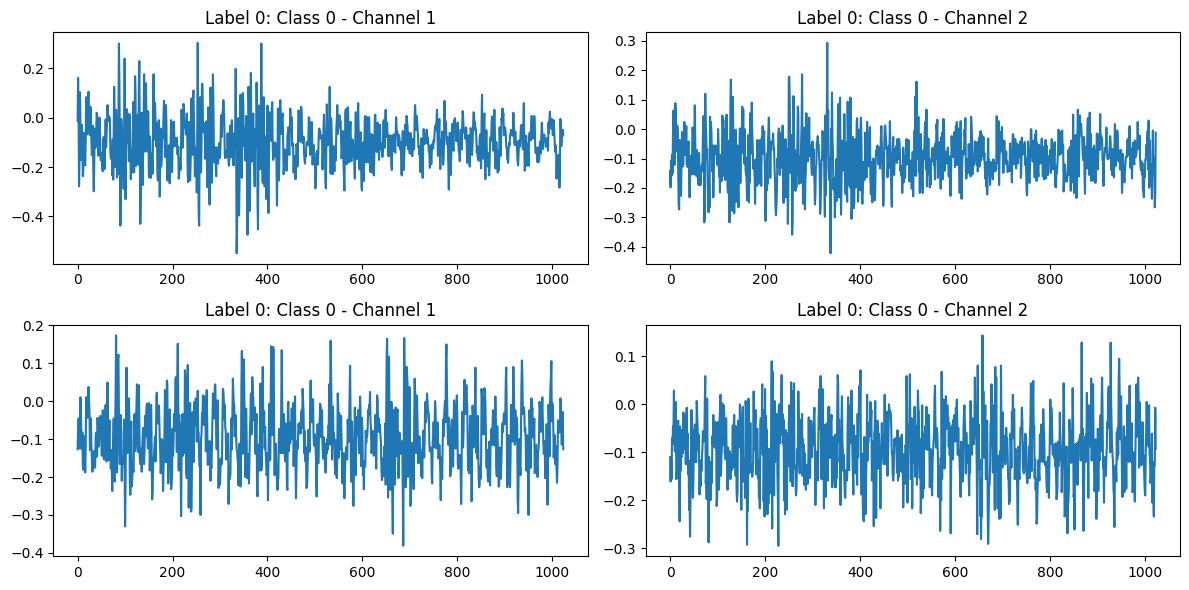

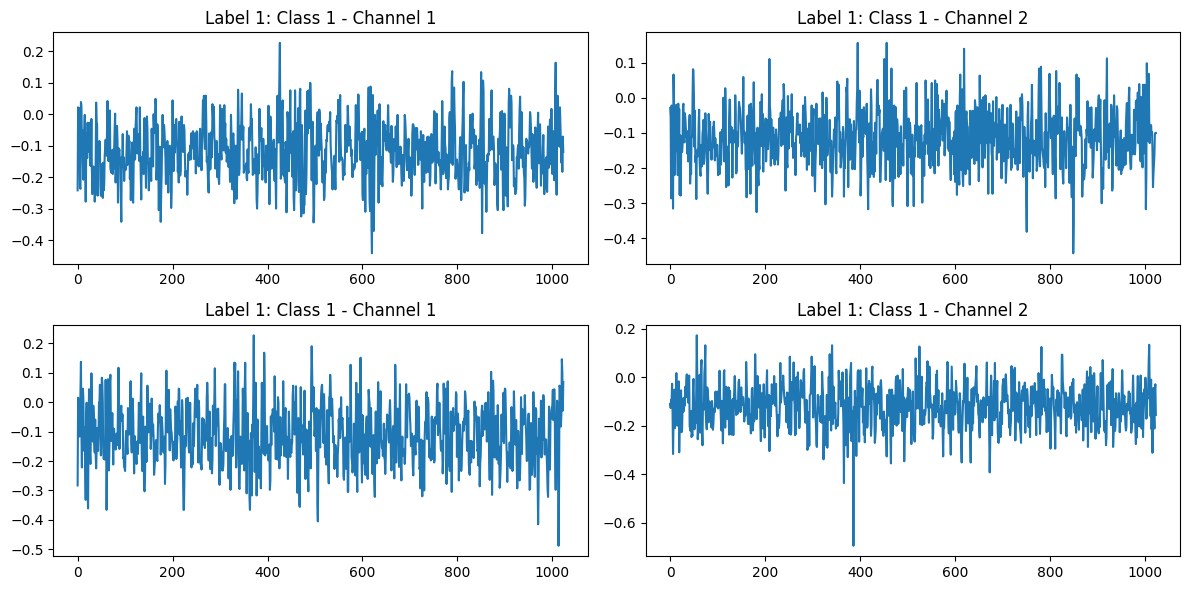

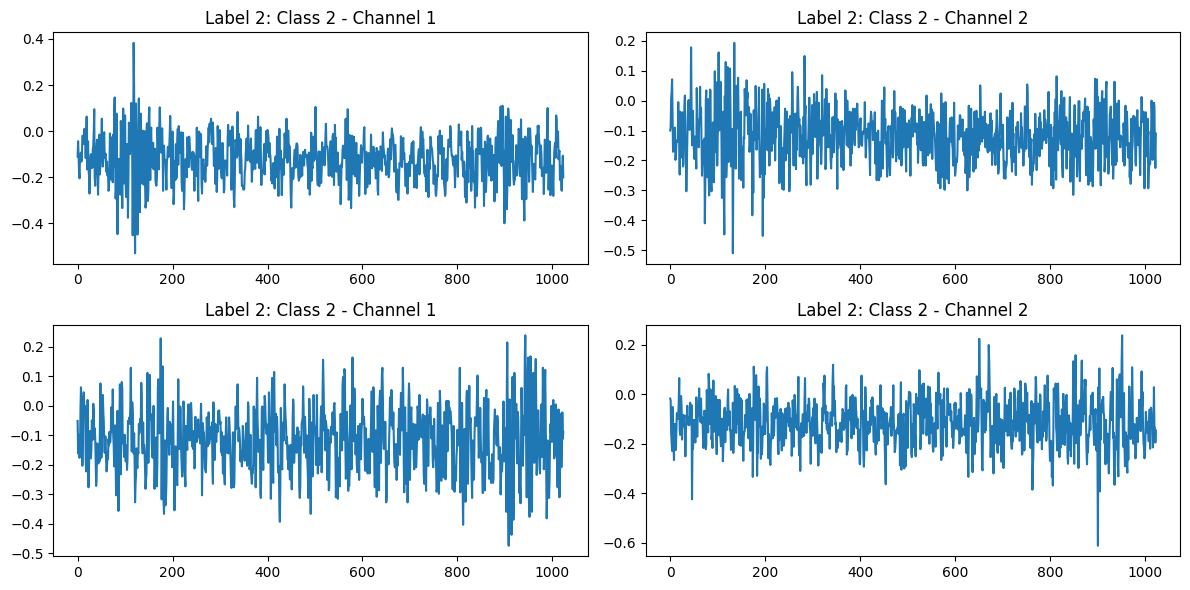

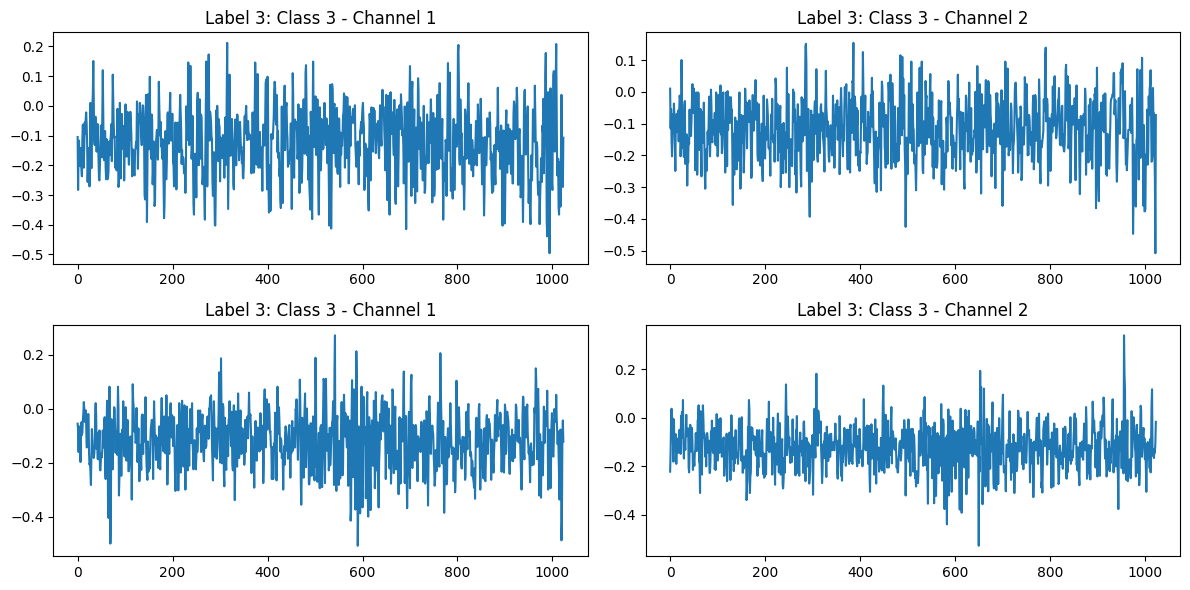

In [13]:
plot_samples('bearing1')

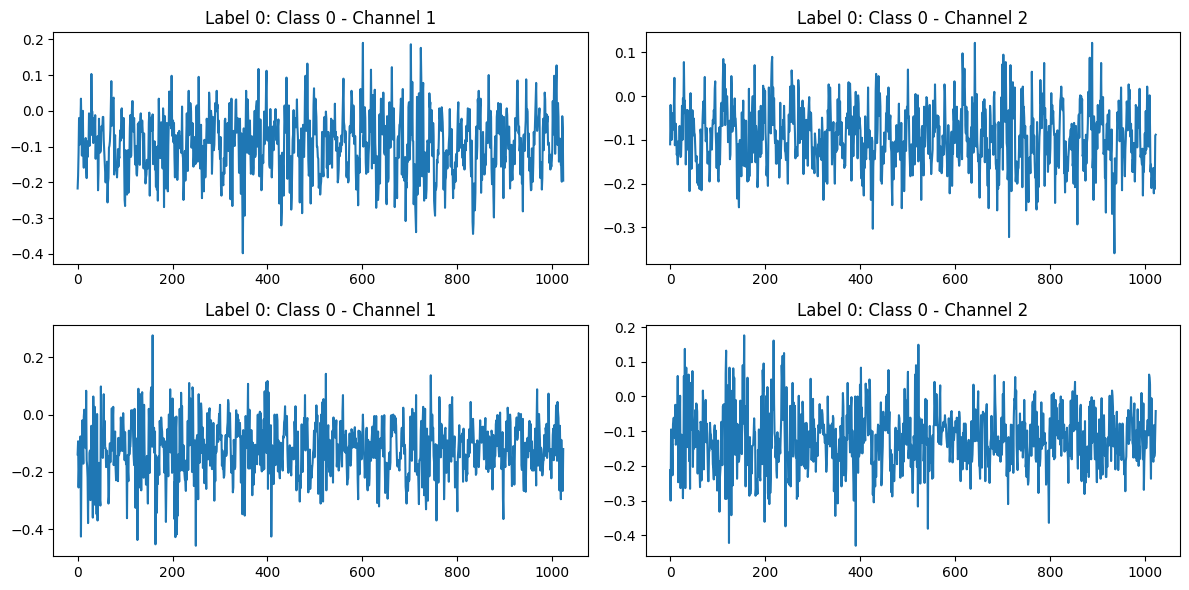

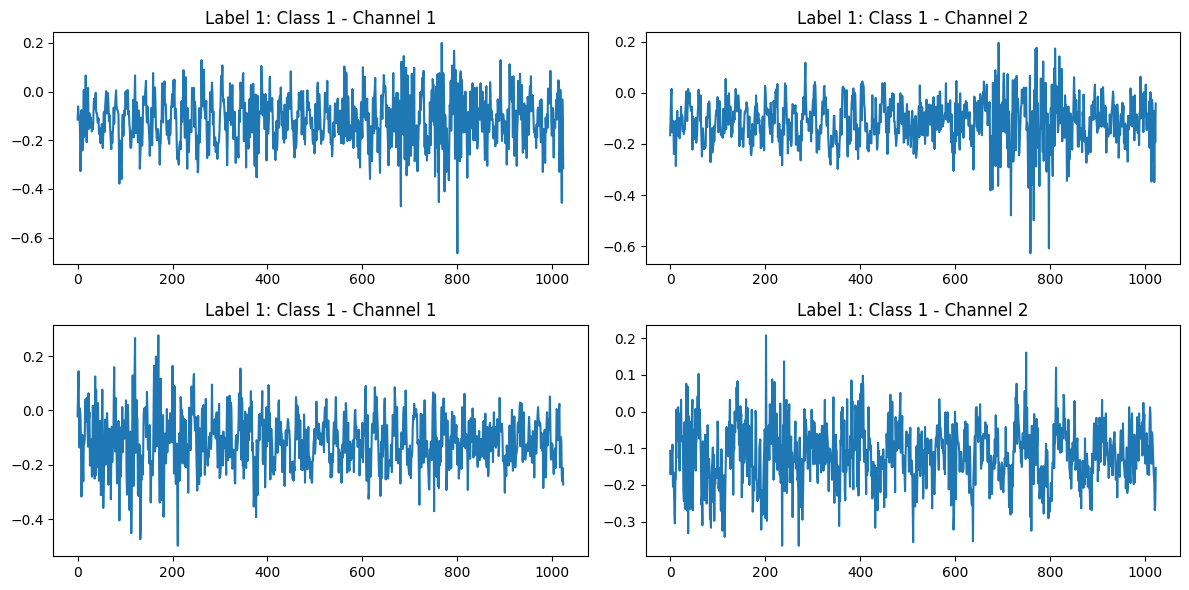

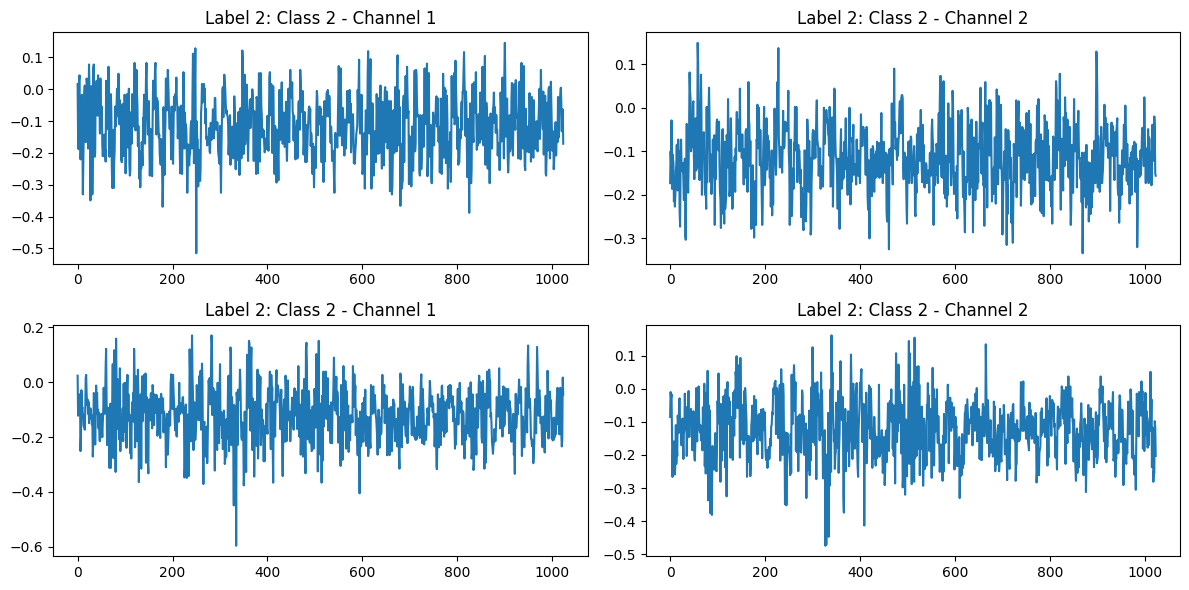

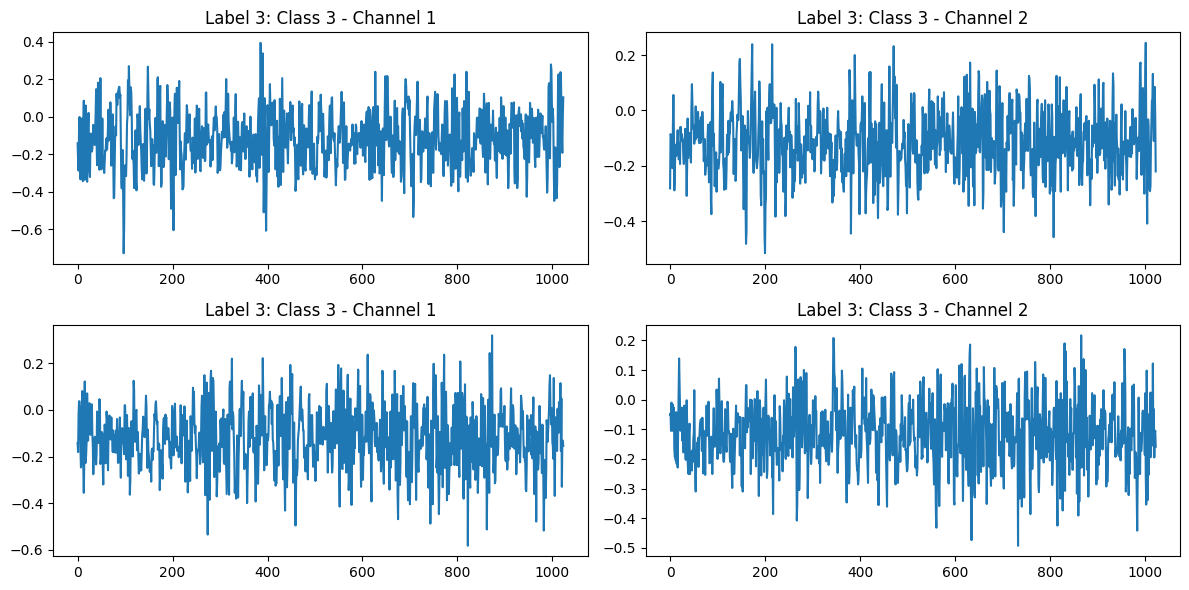

In [14]:
plot_samples('bearing2')

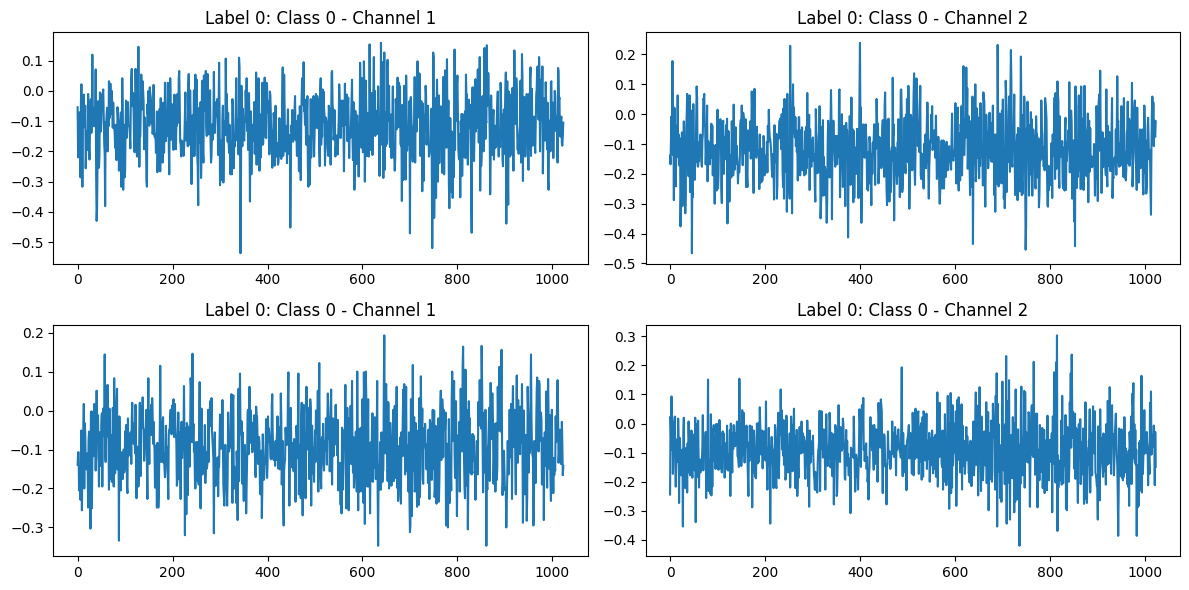

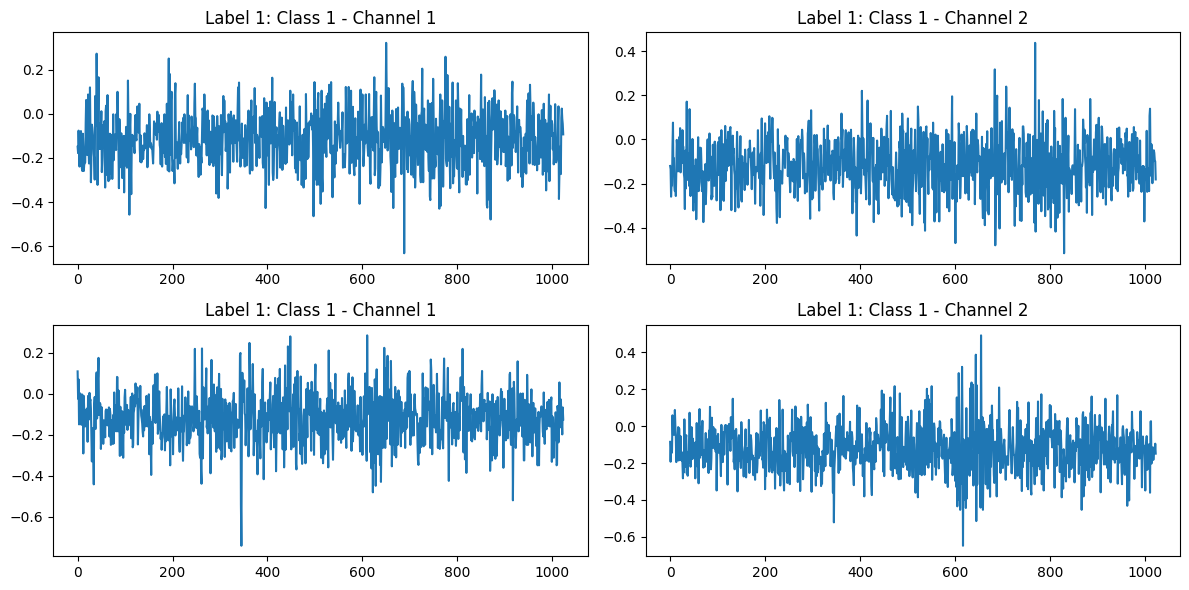

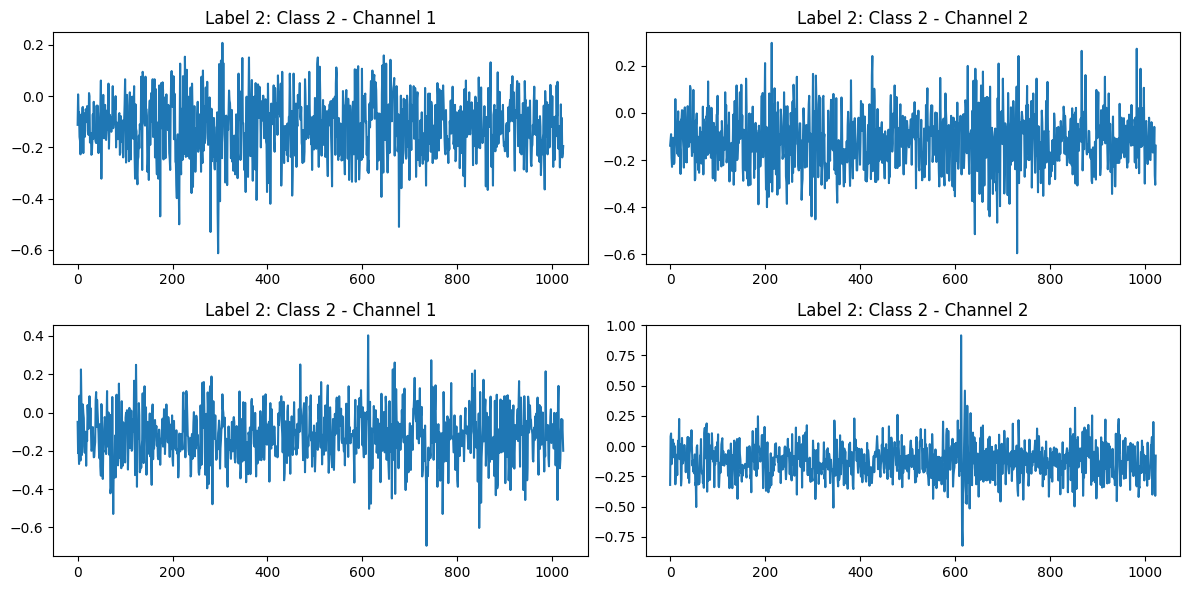

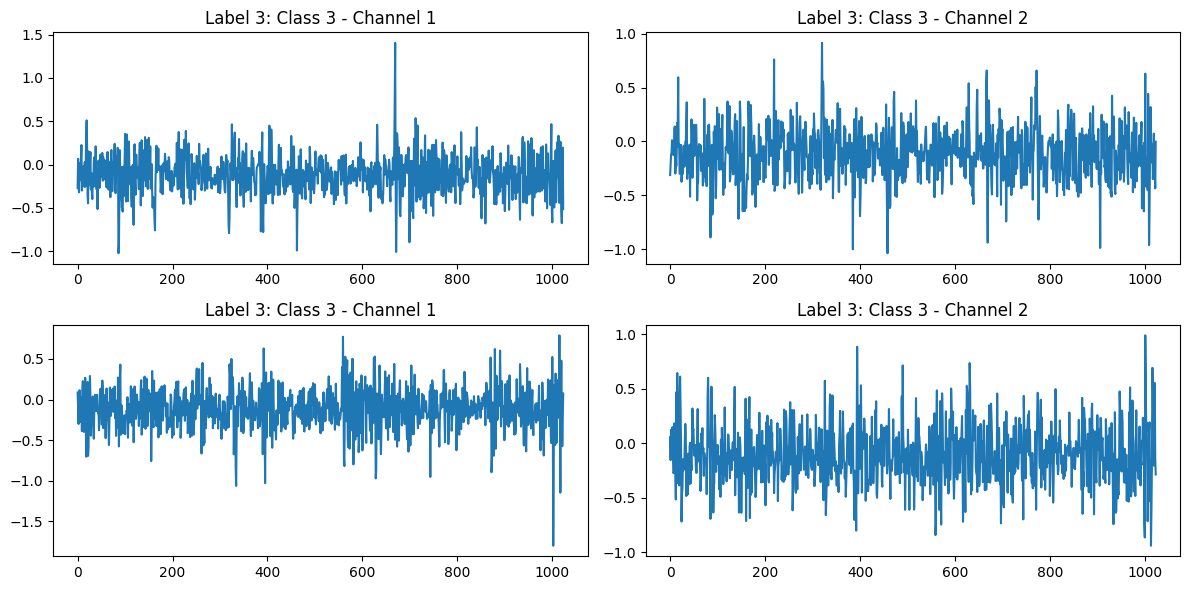

In [15]:
plot_samples('bearing3')

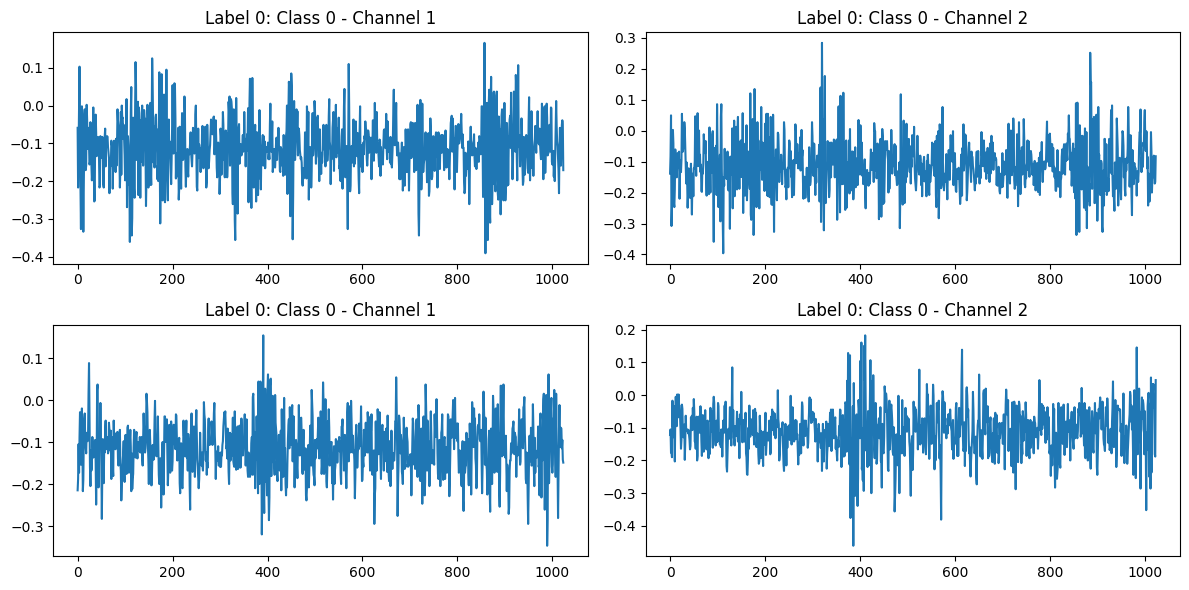

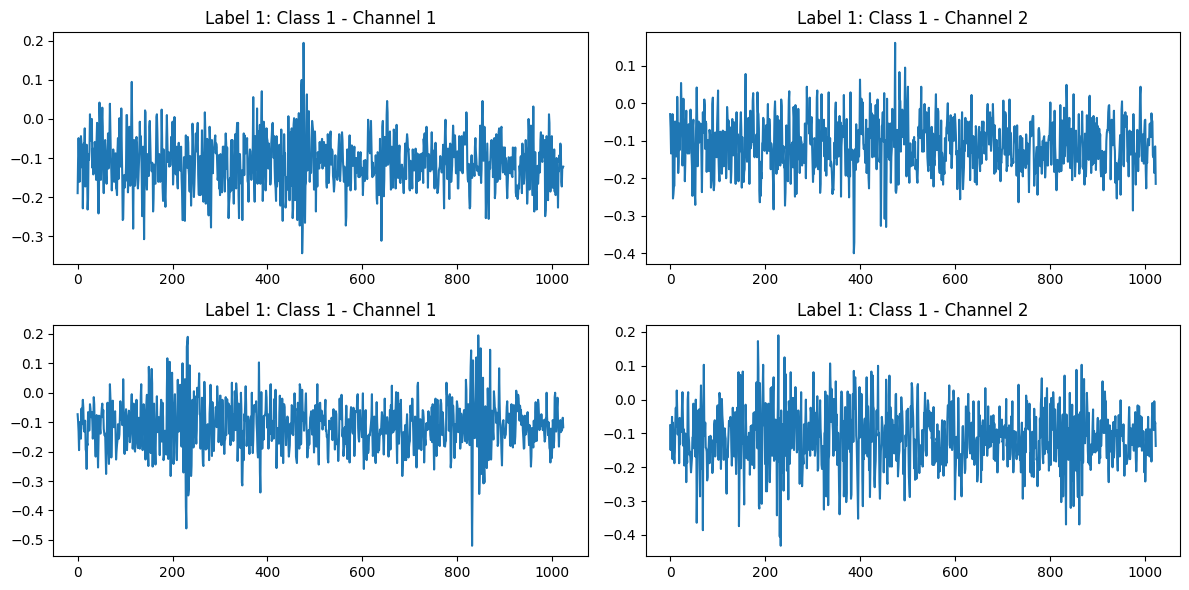

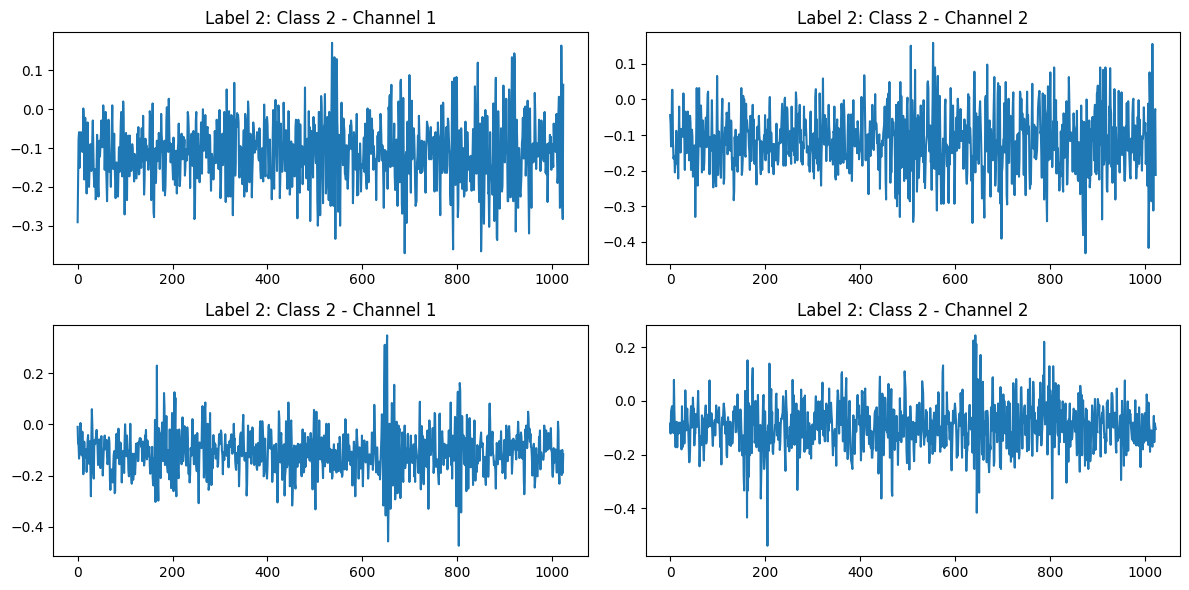

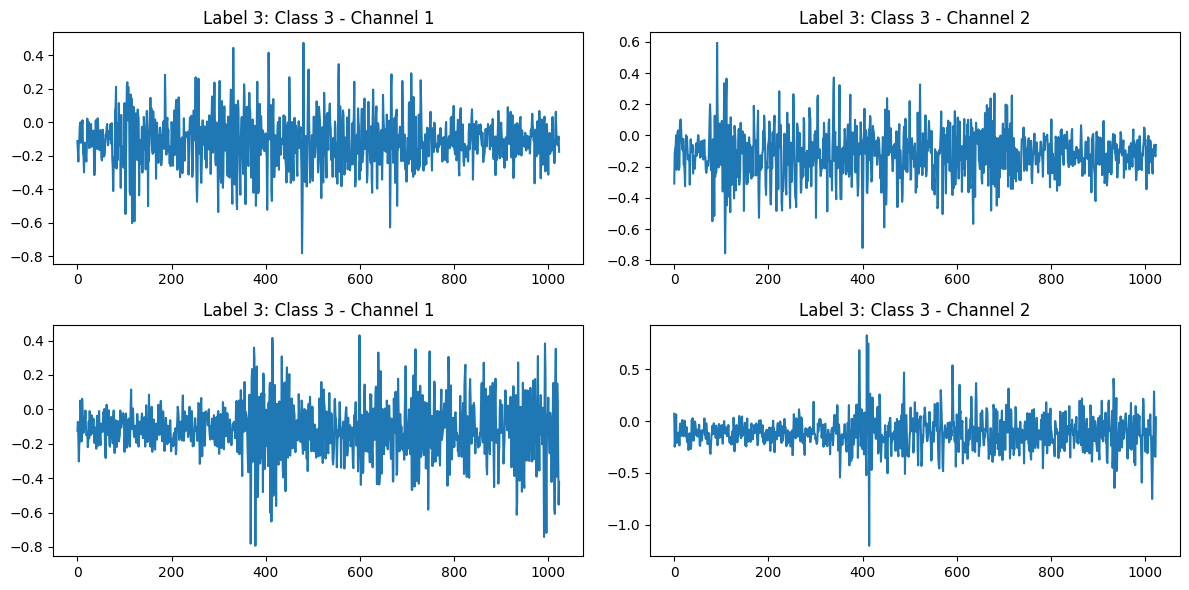

In [16]:
plot_samples('bearing4')

# Process MFPT dataset

In [ ]:
MFPT_dataset_path = os.path.join(os.getcwd(), 'MFPT/MFPT Fault Data Sets')